#introduction

- https://arxiv.org/pdf/1409.1556

* The VGG network (Visual Geometry Group network) is a type of Convolutional Neural Network (CNN) architecture that was proposed by the Visual Geometry Group at Oxford in 2014.
*  The network achieved excellent performance in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC)-2014 competition, ranking second in the classification task but gaining attention due to its performance and simplicity.
* The VGG-16 and VGG-19 models are still often used as benchmarks for other deep learning models.
* Even years after its introduction, VGG models are frequently used for transfer learning in a variety of computer vision tasks.

**Architecture**

* VGG is known for its deep architecture composed of smaller convolutional layers stacked on top of each other. The key design philosophy of VGG is to use multiple small convolutional filters (3x3) with stride 1 and padding to preserve the spatial resolution, rather than using larger filters (e.g., 11x11) as in some previous networks like AlexNet. This approach enables the network to capture more complex features while keeping the computational cost manageable.

* Convolutional Layers:
 - VGG uses multiple 3x3 convolution filters, which is smaller compared to the larger filters used in AlexNet (such as the 11x11 filter in the first layer).
 - All convolution layer will use padding 'same' and stide 1 to preserve spatial resolution.
* Max Pooling:
 - After a few convolutional layers, a 2x2 max-pooling layer is used to downsample the feature maps. This helps in reducing the spatial dimensions of the image progressively.
* Depth of Network:
 - The original VGG network had different versions (VGG-11, VGG-13, VGG-16, VGG-19), named based on the number of weight layers (e.g., VGG-16 has 16 layers with learnable parameters). The deeper the network, the more complex features it can capture. For example, VGG-16 has 13 convolutional layers and 3 fully connected layers.
* Fully Connected Layers:
 - After the convolutional and pooling layers, there are 3 fully connected layers (FC) at the end for classification.
* ReLU Activation:
    - Each convolutional layer is followed by a ReLU activation function to introduce non-linearity.
* Softmax Output:
 - Finally, the network ends with a Softmax layer for multi-class
 classification tasks.

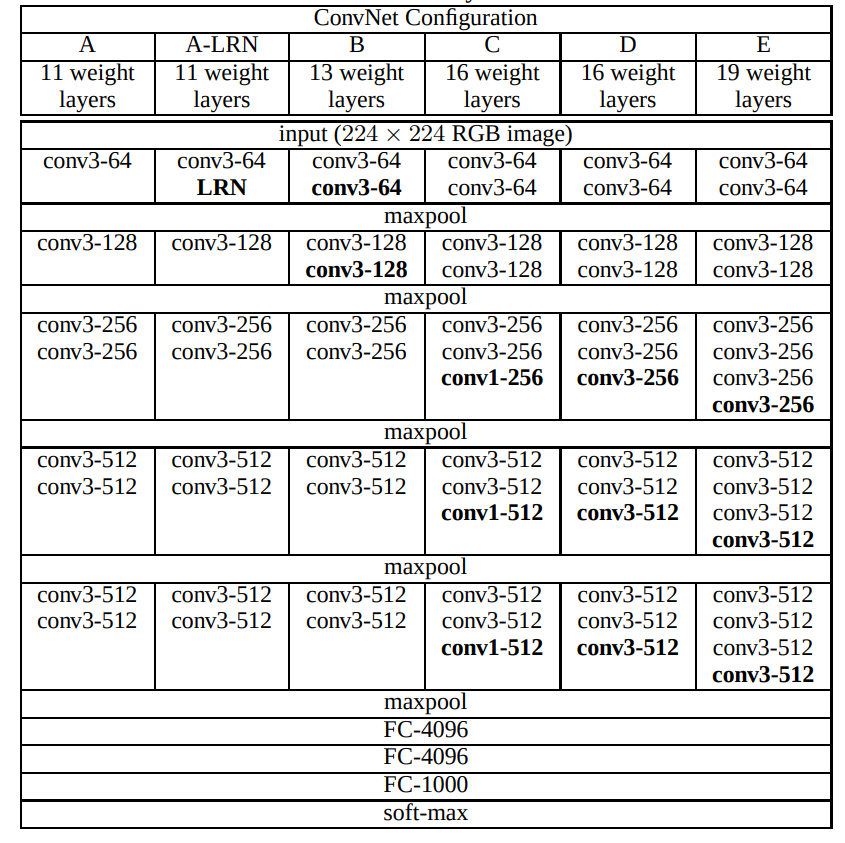

# implementation

In [1]:
!pip install torchview

In [2]:
import torch
import torch.nn as nn
from torchview import draw_graph

In [6]:
class VGG16(nn.Module):
    def __init__(self,num_class:int=1000,dropout:float=0.5):

        super(VGG16,self).__init__()

        self.features = nn.Sequential(

            # input_shape = (3,224,224)
            nn.Conv2d(in_channels=3, out_channels=64,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2), # (64,112,112)

            nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2), # (128,56,56)


            nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2), # (256,28,28)


            nn.Conv2d(in_channels=256, out_channels=512,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2), # (512,14,14)


            nn.Conv2d(in_channels=512, out_channels=512,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512,kernel_size=3,padding='same'),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2), # (512,7,7)

        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=512*7*7,out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),

            nn.Linear(in_features=4096,out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),

            nn.Linear(in_features=4096,out_features=num_class)
        )


    def forward(self,x):
        x = self.features(x)
        x = x.view(x.size(0),-1)
        x = self.classifier(x)
        return x

In [7]:
vgg_model = VGG16()

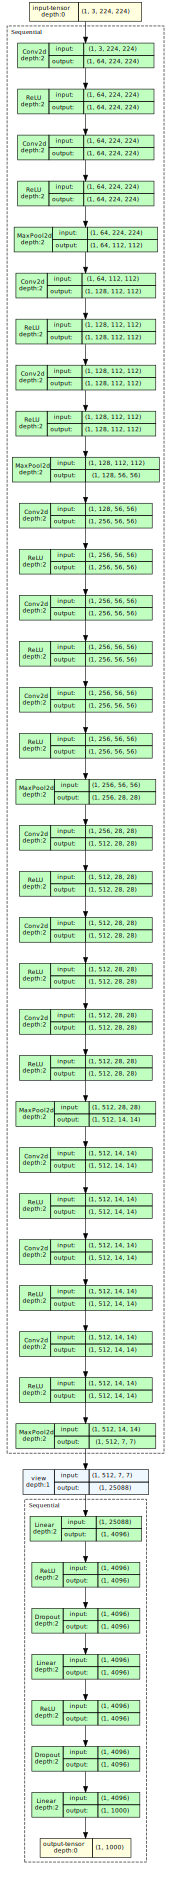

In [10]:
draw_graph(vgg_model,input_size = (1,3,224,224),expand_nested=True).visual_graph